In [1]:
import os
import json
import csv
from collections import defaultdict, Counter

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

run_folder = 'C:/Documents/Leiden/Semester 2/DRL/Assignment 3/Scripts/runs'

In [2]:
def folder_results(folder_path: str):
    with open(os.path.join(folder_path, 'config.json')) as conf_file:
        conf = json.load(conf_file)

    reward = np.genfromtxt(os.path.join(folder_path, 'rewards.csv'), delimiter=',', skip_header=1)
    val_score = np.genfromtxt(os.path.join(folder_path, 'validation_rewards.csv'), delimiter=',')
    return conf, reward, val_score

In [30]:
def get_numbers(folder_path: str):
    rewards = []
    validations = []

    for folders in os.listdir(folder_path):
        conf, reward, val_score = folder_results(os.path.join(folder_path, folders))
        rewards.append(reward)
        validations.append(val_score)
    return rewards, validations

def plot_conf(runs, title='', figsize=(10,10), validation=False):
    smoothed = [np.concatenate([savgol_filter(run, 99, 1)]) for run in runs]
    
    max_len = max([len(i) for i in smoothed])
    means = []
    stds = []

    for i in range(max_len):
        means.append(np.mean([run[i] for run in smoothed if len(run) > i]))
        stds.append(np.std([run[i] for run in smoothed if len(run) > i]))
    

    means = np.array(means)
    stds = np.array(stds)
    
    plt.figure(figsize=figsize)
    plt.plot(range(len(means)), means, color = 'purple')
    plt.fill_between(range(len(means)),means, means+stds, color='blue', alpha=0.2)
    plt.fill_between(range(len(means)),means, means-stds,  color='blue', alpha=0.2)
    
    plt.axhline(475, linestyle='--', color='red', linewidth=1)
    
    if validation:
        plt.axhline(np.mean(means), linestyle='--', color='purple', linewidth=2, 
                    label='Avg. Vali. Reward = '+str(round(np.mean(means), 2)))
        plt.legend(fontsize=14)
    
    plt.xlabel('Episode', fontsize=16)
    plt.xlim(0, max_len)
    plt.ylabel('Reward', fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.title(title, fontsize=14)
    plt.grid()

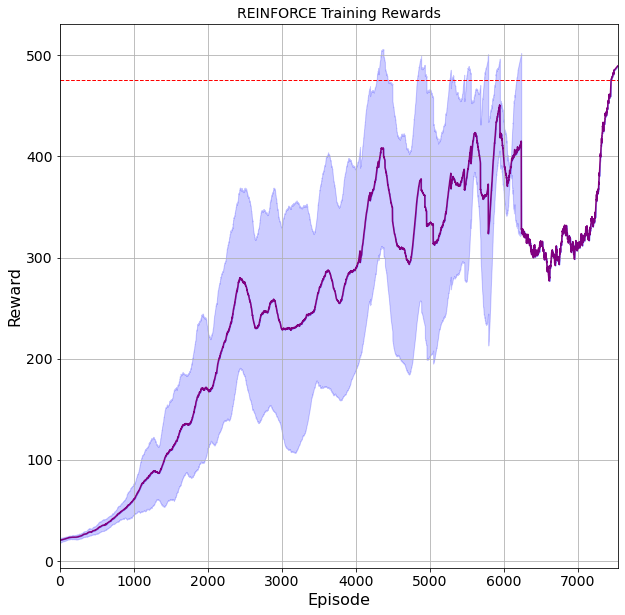

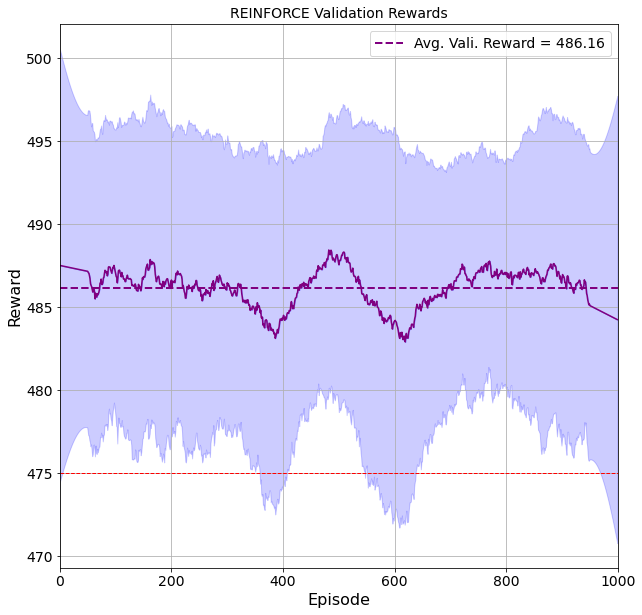

In [31]:
reinf_folder = run_folder + '/reinforce_final' 
reinf_rewards, reinf_validations = get_numbers(reinf_folder)
plot_conf(reinf_rewards, title = 'REINFORCE Training Rewards')
plot_conf(reinf_validations, title = 'REINFORCE Validation Rewards', validation=True)

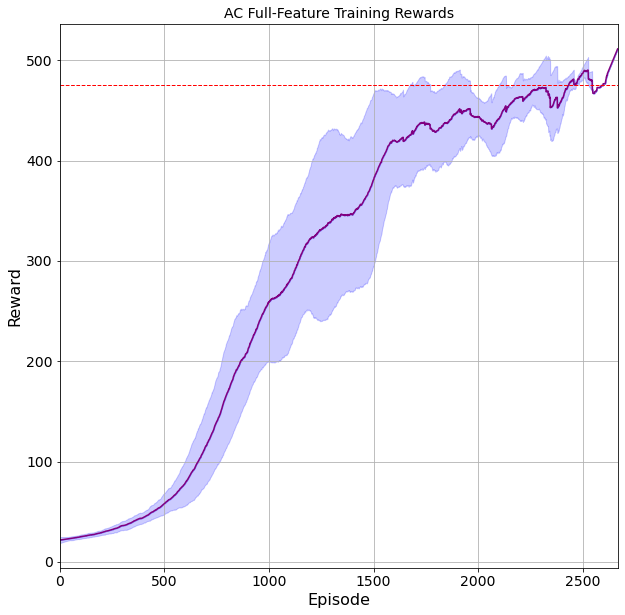

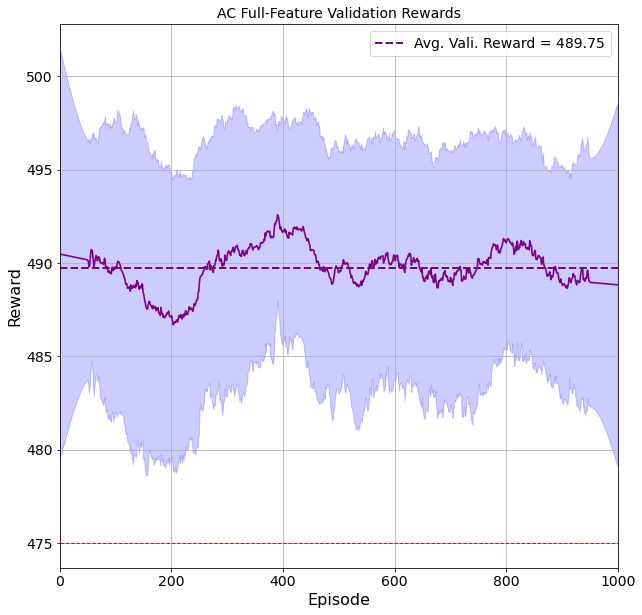

In [33]:
ac_bsbs_folder = run_folder + '/ac_bs_bs_final'
ac_bsbs_rewards, ac_bsbs_validations = get_numbers(ac_bsbs_folder)
plot_conf(ac_bsbs_rewards, title = 'AC Full-Feature Training Rewards')
plot_conf(ac_bsbs_validations, title = 'AC Full-Feature Validation Rewards', validation = True)

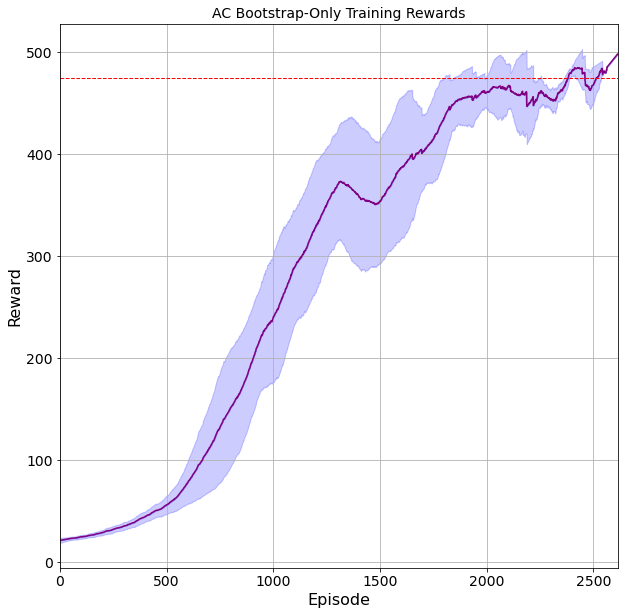

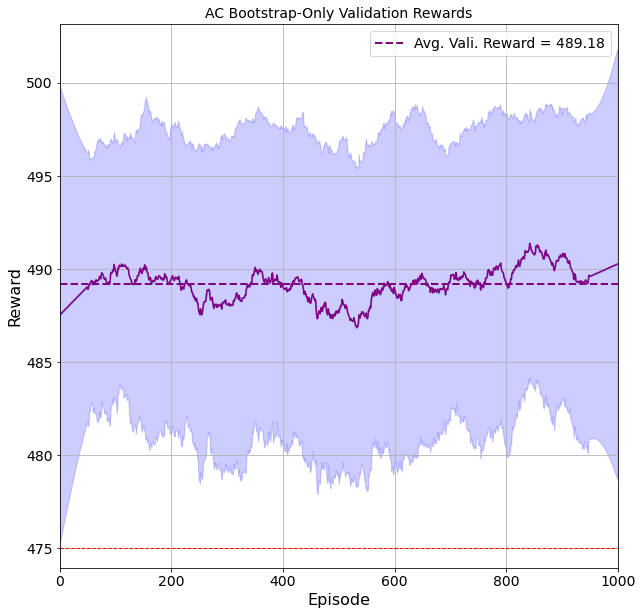

In [34]:
ac_bootstrap_folder = run_folder + '/ac_bootstrap_final'
ac_bootstrap_rewards, ac_bootstrap_validations = get_numbers(ac_bootstrap_folder)
plot_conf(ac_bootstrap_rewards, title = 'AC Bootstrap-Only Training Rewards')
plot_conf(ac_bootstrap_validations, title = 'AC Bootstrap-Only Validation Rewards', validation = True)

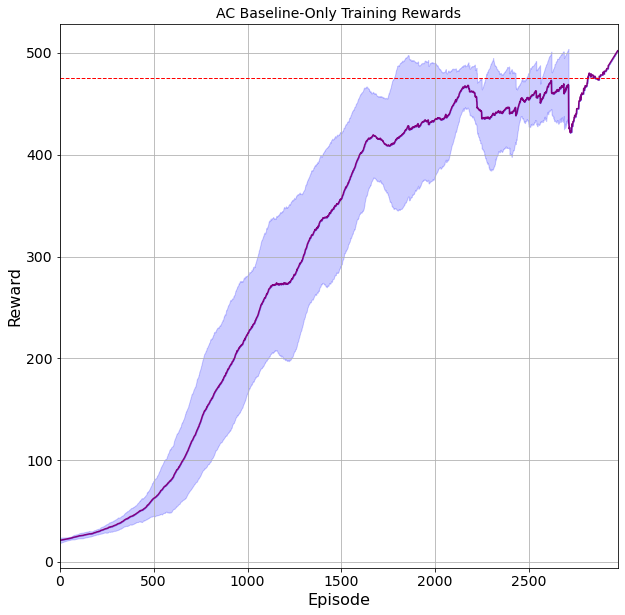

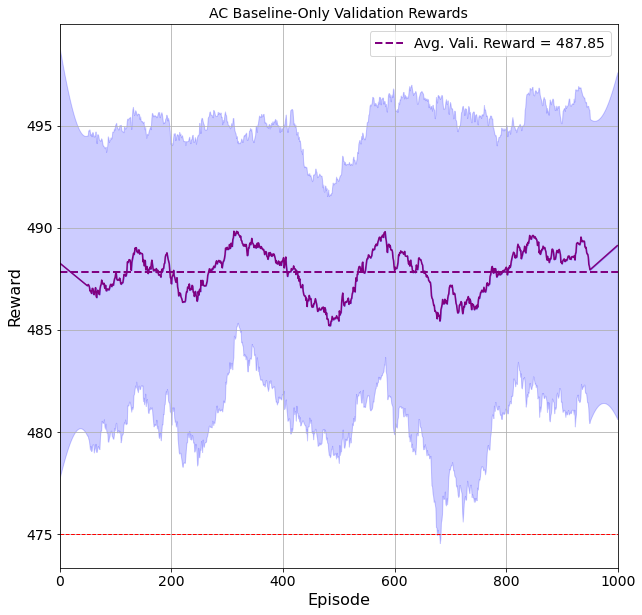

In [35]:
ac_baseline_folder = run_folder + '/ac_baseline_final'
ac_baseline_rewards, ac_baseline_validations = get_numbers(ac_baseline_folder)
plot_conf(ac_baseline_rewards, title = 'AC Baseline-Only Training Rewards')
plot_conf(ac_baseline_validations, title = 'AC Baseline-Only Validation Rewards', validation = True)